In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew

In [2]:
df = pd.read_csv("C:/Users/Yash/OneDrive/Documents/UB_Fall_23/DIC/Project/Stroke_prediction/stroke_data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#Initial Data Inspection:
df.shape

(5110, 12)

In [5]:
#checking for duplicate entries in dataframe considering all columns
duplicate_row = df[df.duplicated()]
len(duplicate_row)

0

In [6]:
missing_values = df.isnull()
missing_values

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Total number of missing values per column
missing_values = df.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#inspecting datatypes of the dataframe
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
#finding mean of all columns
df.mean()

C:\Users\Yash\AppData\Local\Temp\ipykernel_46776\2056718026.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

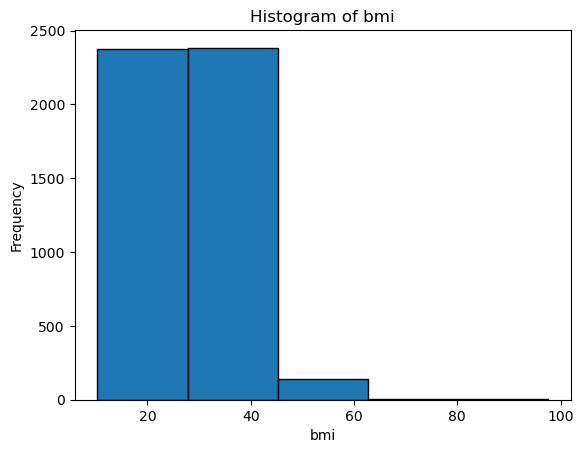

In [10]:
#plotting histogram of bmi column
plt.hist(df['bmi'], bins=5, edgecolor='k')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('Histogram of bmi')
plt.show()

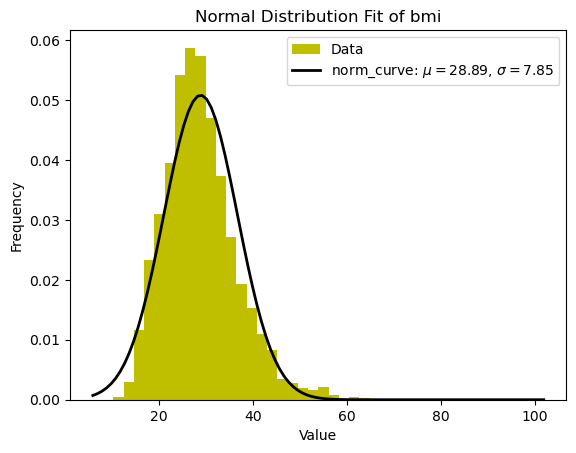

In [11]:
#Normal distribution curve of bmi

filtered_df = df[df['bmi'].notnull()] # filtering none values from dataframe
filtered_df
mu, std = norm.fit(filtered_df['bmi'])
plt.hist(filtered_df['bmi'], bins=40, density=True, color='y',label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='norm_curve: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, std))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Fit of bmi')
plt.legend()
plt.show()


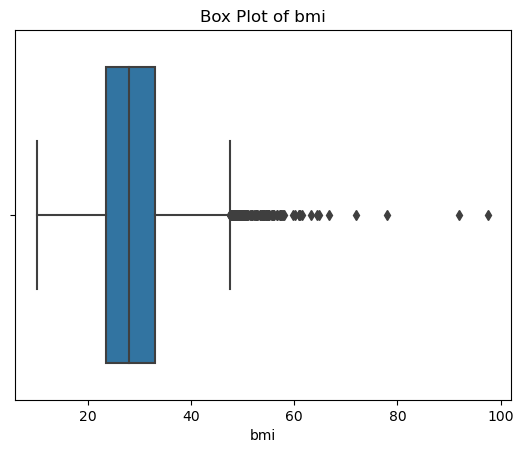

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the bmi
sns.boxplot(x=filtered_df['bmi'])
plt.xlabel('bmi')
plt.title('Box Plot of bmi')
plt.show()

In [13]:
skewness = skew(filtered_df['bmi'])
skewness

1.0550177068872404

In [14]:
import numpy as np
from scipy import stats
trim_percentage = 10           
trimmed_mean_bmi = stats.trim_mean(filtered_df['bmi'], proportiontocut=trim_percentage/100)
print("trimmed mean of bmi :",trimmed_mean_bmi)

trimmed mean of bmi : 28.34270806821074


In [15]:
# Performing above analysis for imputation of null values in bmi column
# In conclusion, I feel replacing with trimmed mean will be a reasonable approach.
df['bmi'].fillna(trimmed_mean_bmi,inplace = True)

In [16]:
#verifiying are null values replaced with trimmed mean or not
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

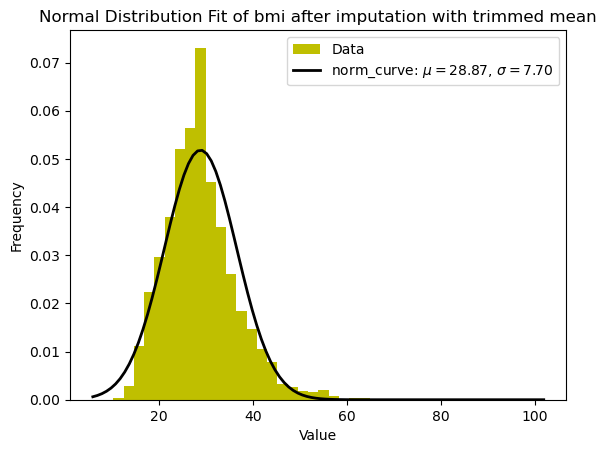

In [17]:
mu, std = norm.fit(df['bmi'])
plt.hist(df['bmi'], bins=40, density=True, color='y',label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='norm_curve: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, std))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Fit of bmi after imputation with trimmed mean')
plt.legend()
plt.show()

In [18]:
less_than_18 = df[df['age']<18]
less_than_18

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,28.342708,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.900000,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.000000,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.800000,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.300000,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.400000,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.500000,Unknown,0


In [19]:
#Data Transformation : 
df['age'] = np.ceil(df['age']).astype(int)

In [21]:
df['bmi'] = np.round(df['bmi'],2)

In [22]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.34,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,28.34,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [23]:
#checking wheather work_type = children having age less than 18
children_df = df[df['work_type'] == 'children']
result = children_df[['age', 'work_type']]
age_gt_18 = list(result['age']>18)
age_gt_18

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [24]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.34,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,28.34,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [29]:
# Analysing the records of never_worked work_type because it seems that most of its records should belong to work_type children.
df[df['work_type'] == 'Never_worked']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,61408,Male,23,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,13948,Female,19,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,16556,Male,13,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,56986,Male,17,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,41870,Male,17,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,13862,Female,13,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,51935,Male,16,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,61219,Female,14,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,23508,Female,17,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


In [41]:
#Grouping by worktype and taking out average of bmi and average
averages = df.groupby('work_type')[['bmi', 'avg_glucose_level']].mean().reset_index()
averages

,work_type,bmi,avg_glucose_level
0,Govt_job,30.432390,107.779772
1,Never_worked,25.545455,96.042727
2,Private,30.228055,106.796844
3,Self-employed,30.111306,112.645446
4,children,20.231354,94.400277


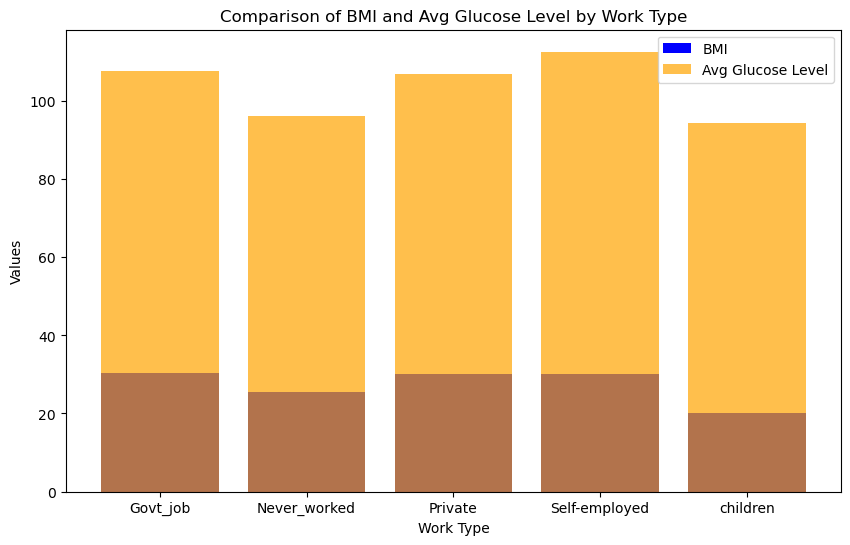

In [48]:
# Plotting above analysis
plt.figure(figsize=(10, 6))
plt.bar(averages['work_type'], averages['bmi'], label='BMI', color='blue')
plt.bar(averages['work_type'], averages['avg_glucose_level'], label='Avg Glucose Level', color='orange', alpha=0.7)
plt.xlabel('Work Type')
plt.ylabel('Values')
plt.title('Comparison of BMI and Avg Glucose Level by Work Type')
plt.legend()
plt.xticks()
plt.show()


In [60]:
#eliminating irrelevant data.
df[df['gender'] == 'Other'] #here i found a row which has gender other, it doesn't seems to be beneficial.
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
